<a href="https://colab.research.google.com/github/subhomoy-roy-choudhury/AI-Notebooks/blob/master/Captcha_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install transformers pillow requests matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.5 MB/s eta 0:00:00


In [31]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [78]:
path1 = '/content/Kaptcha.jpg'
path2 = '/content/Kaptcha (2).jpg'

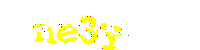

True

In [79]:
img = cv2.imread(path2,cv2.IMREAD_COLOR)
ret, thresh_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)

# Black Backgorund to white
thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [255,255,255]


cv2_imshow(thresh_img)
cv2.imwrite("result11.jpg", thresh_img)

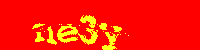

True

In [80]:
gray_image = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2HSV)
cv2_imshow(gray_image)
cv2.imwrite("result111.jpg", gray_image)

In [82]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database (actually this model is meant to be used on printed text)
url = '/content/result111.jpg'
# image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image = Image.open(url).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'THEBY ISSU'